In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data = pd.read_csv("/Users/mehrac/Desktop/DSA-Python/heart.csv")


In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
data.shape

(303, 14)

In [4]:
data.drop_duplicates(inplace=True)

In [5]:
data.shape

(302, 14)

In [11]:
sns.pairplot(data)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Axes: >

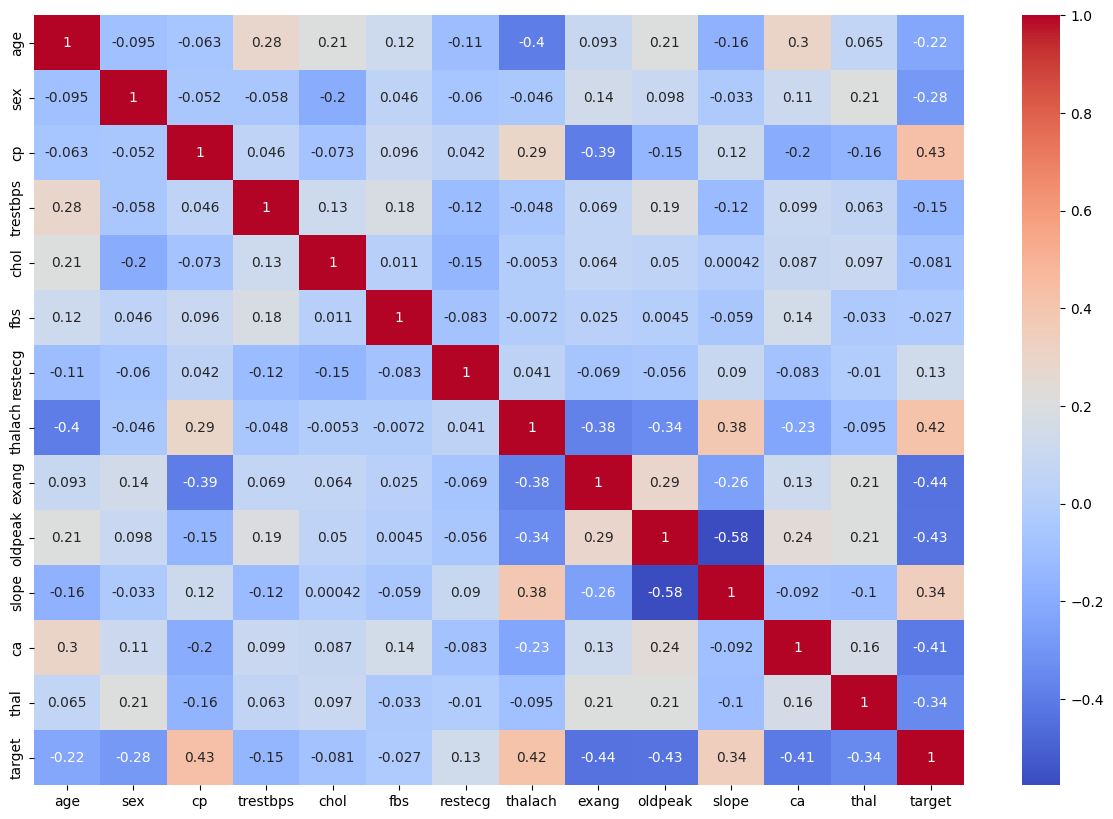

In [6]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


One Hot Encoding

1. changing dns and thal to object type


In [9]:
data[['cp', 'thal']] = data[['cp', 'thal']].astype(object)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    object 
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    object 
 13  target    302 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 35.4+ KB


In [13]:
print(data.cp.unique())
print(data.thal.unique())

[3 2 1 0]
[1 2 3 0]


In [10]:
data_cp_thal = data[['cp', 'thal']]
data_cp_thal = pd.get_dummies(data_cp_thal, drop_first=True)
data_ = data.drop(data.select_dtypes(include=['object']).columns, axis=1)
data_final = pd.concat([data_, data_cp_thal], axis=1)
data_final.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3
0,63,1,145,233,1,0,150,0,2.3,0,0,1,False,False,True,True,False,False
1,37,1,130,250,0,1,187,0,3.5,0,0,1,False,True,False,False,True,False
2,41,0,130,204,0,0,172,0,1.4,2,0,1,True,False,False,False,True,False
3,56,1,120,236,0,1,178,0,0.8,2,0,1,True,False,False,False,True,False
4,57,0,120,354,0,1,163,1,0.6,2,0,1,False,False,False,False,True,False


In [14]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   trestbps  302 non-null    int64  
 3   chol      302 non-null    int64  
 4   fbs       302 non-null    int64  
 5   restecg   302 non-null    int64  
 6   thalach   302 non-null    int64  
 7   exang     302 non-null    int64  
 8   oldpeak   302 non-null    float64
 9   slope     302 non-null    int64  
 10  ca        302 non-null    int64  
 11  target    302 non-null    int64  
 12  cp_1      302 non-null    bool   
 13  cp_2      302 non-null    bool   
 14  cp_3      302 non-null    bool   
 15  thal_1    302 non-null    bool   
 16  thal_2    302 non-null    bool   
 17  thal_3    302 non-null    bool   
dtypes: bool(6), float64(1), int64(11)
memory usage: 32.4 KB


2. train test split (if dataset is small, train set should be more (70-75)

In [16]:
y = data_final['target'].values
X = data_final.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((226, 17), (76, 17), (226,), (76,))

3 using StandartScaler

In [17]:
from sklearn.preprocessing import StandardScaler
rc = StandardScaler().fit(X_train)
X_train_scaled = rc.transform(X_train)
X_test_scaled = rc.transform(X_test)

4 Models. First Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression as LogReg
classifier = LogReg(random_state=42)
logistic_model = classifier.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)


5. Check result with confusion matrix

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
print('Confusion matric for LogReg:''\n\n', cm_logistic)
print("Accuracy Score:", accuracy_score(y_test, y_pred_logistic))
print("Precision Score:", precision_score(y_test, y_pred_logistic))
print("F1 score:", f1_score(y_test, y_pred_logistic))
print("Recall score:", recall_score(y_test, y_pred_logistic))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_logistic))


Confusion matric for LogReg:

 [[31  4]
 [ 4 37]]
Accuracy Score: 0.8947368421052632
F1 score: 0.9024390243902439
Recall score: 0.9024390243902439
ROC AUC Score: 0.8940766550522647


6. use cross validation

In [28]:
from sklearn.model_selection import cross_validate
accuracies = cross_validate(estimator = logistic_model, X = X_train_scaled, y = y_train, cv = 4, scoring = ["f1", 'roc_auc', 'recall'])
accuracies

{'fit_time': array([0.00566506, 0.00213981, 0.0076921 , 0.00168991]),
 'score_time': array([0.00469398, 0.00410819, 0.0054152 , 0.0027132 ]),
 'test_f1': array([0.88888889, 0.82539683, 0.83076923, 0.81967213]),
 'test_roc_auc': array([0.86972705, 0.86600496, 0.91025641, 0.92129032]),
 'test_recall': array([0.90322581, 0.83870968, 0.9       , 0.80645161])}

7. Models. Lets do KNN model. we set N as 7 bcs we have enuff features but not many observations, thats how we can minimize underfitting <br> cross validations <br> confusion matrix


In [49]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7, metric= 'euclidean')
KNN_model = classifier.fit(X_train_scaled, y_train)
y_pred_KNN = KNN_model.predict(X_test_scaled)

cm_KNN = confusion_matrix(y_test, y_pred_KNN)

print('Confusion matric for KNN:''\n\n', cm_KNN)
print("Accuracy Score:", accuracy_score(y_test, y_pred_KNN))
print("Precision Score:", precision_score(y_test, y_pred_KNN))
print("F1 score:", f1_score(y_test, y_pred_KNN))
print("Recall score:", recall_score(y_test, y_pred_KNN))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_KNN))

Confusion matric for KNN:

 [[30  5]
 [ 6 35]]
Accuracy Score: 0.8552631578947368
Precision Score: 0.875
F1 score: 0.8641975308641976
Recall score: 0.8536585365853658
ROC AUC Score: 0.8554006968641115


In [35]:
accuracies = cross_validate(estimator = KNN_model, X = X_train_scaled, y = y_train, cv = 4, scoring = ["f1", 'roc_auc', 'recall'])
accuracies

{'fit_time': array([0.00332689, 0.00031686, 0.00029802, 0.00025511]),
 'score_time': array([0.01788497, 0.00664401, 0.00706077, 0.00560784]),
 'test_f1': array([0.79310345, 0.83076923, 0.8125    , 0.83333333]),
 'test_roc_auc': array([0.87593052, 0.8691067 , 0.83589744, 0.90129032]),
 'test_recall': array([0.74193548, 0.87096774, 0.86666667, 0.80645161])}

8. Models. Lets do Naive Bayes model.  <br> cross validations <br> confusion matrix

In [38]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
NB_model = classifier.fit(X_train_scaled, y_train)
y_pred_NB = NB_model.predict(X_test_scaled)


In [50]:
cm_NB = confusion_matrix(y_test, y_pred_NB)

print("Confusion matrix NB:"'\n\n', cm_NB)
print("Accuracy Score:", accuracy_score(y_test, y_pred_NB))
print("Precision Score:", precision_score(y_test, y_pred_NB))
print("F1 score:", f1_score(y_test, y_pred_NB))
print("Recall score:", recall_score(y_test, y_pred_NB))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_NB))

Confusion matrix NB:

 [[31  4]
 [ 6 35]]
Accuracy Score: 0.868421052631579
Precision Score: 0.8974358974358975
F1 score: 0.875
Recall score: 0.8536585365853658
ROC AUC Score: 0.8696864111498257


In [41]:
accuracies = cross_validate(estimator = NB_model, X = X_train_scaled, y = y_train, cv = 4, scoring = ["f1", 'roc_auc', 'recall'])
accuracies

{'fit_time': array([0.00102186, 0.00044799, 0.00040197, 0.00037503]),
 'score_time': array([0.00506687, 0.00279093, 0.00243711, 0.00229096]),
 'test_f1': array([0.81355932, 0.83333333, 0.83076923, 0.82758621]),
 'test_roc_auc': array([0.86600496, 0.89826303, 0.83076923, 0.91612903]),
 'test_recall': array([0.77419355, 0.80645161, 0.9       , 0.77419355])}

9. SVM model <br> cross validations <br> confusion matrix

In [42]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', probability=True, random_state=42)
SVM_model = classifier.fit(X_train_scaled, y_train)
y_pred_SVM = SVM_model.predict(X_test_scaled)

In [51]:
cm_SVM = confusion_matrix(y_test, y_pred_SVM)

print("Confusion matrix SVM"'\n\n', cm_SVM)
print("Accuracy Score:", accuracy_score(y_test, y_pred_SVM))
print("Precision Score:", precision_score(y_test, y_pred_SVM))
print("F1 score:", f1_score(y_test, y_pred_SVM))
print("Recall score:", recall_score(y_test, y_pred_SVM))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_SVM))


Confusion matrix SVM

 [[29  6]
 [ 6 35]]
Accuracy Score: 0.8421052631578947
Precision Score: 0.8536585365853658
F1 score: 0.8536585365853658
Recall score: 0.8536585365853658
ROC AUC Score: 0.841114982578397


In [44]:
accuracies = cross_validate(estimator = SVM_model, X = X_train_scaled, y = y_train, cv = 4, scoring = ["f1", 'roc_auc', 'recall'])
accuracies

{'fit_time': array([0.00497508, 0.00434899, 0.00451303, 0.00430202]),
 'score_time': array([0.00355005, 0.00347686, 0.00335479, 0.00319099]),
 'test_f1': array([0.79310345, 0.83870968, 0.80597015, 0.84745763]),
 'test_roc_auc': array([0.89702233, 0.882134  , 0.88333333, 0.91354839]),
 'test_recall': array([0.74193548, 0.83870968, 0.9       , 0.80645161])}

10. Decision Trees <br> cross validations <br> confusion matrix

In [52]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy", random_state=42)
DT_model = classifier.fit(X_train_scaled, y_train)
y_pred_DT = DT_model.predict(X_test_scaled)

cm_DT = confusion_matrix(y_test, y_pred_DT)

print("Confusion matrix SVM"'\n\n', cm_DT)
print("Accuracy Score:", accuracy_score(y_test, y_pred_DT))
print("Precision Score:", precision_score(y_test, y_pred_DT))
print("F1 score:", f1_score(y_test, y_pred_DT))
print("Recall score:", recall_score(y_test, y_pred_DT))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_DT))



Confusion matrix SVM

 [[29  6]
 [16 25]]
Accuracy Score: 0.7105263157894737
Precision Score: 0.8064516129032258
F1 score: 0.6944444444444445
Recall score: 0.6097560975609756
ROC AUC Score: 0.7191637630662021


In [48]:
accuracies = cross_validate(estimator= DT_model, X = X_train_scaled, y = y_train, cv = 4, scoring = ["f1", 'roc_auc', 'recall'])
accuracies

{'fit_time': array([0.00136185, 0.00101185, 0.00100136, 0.00108504]),
 'score_time': array([0.00268531, 0.00241923, 0.00274682, 0.0024581 ]),
 'test_f1': array([0.76190476, 0.78688525, 0.74193548, 0.69230769]),
 'test_roc_auc': array([0.73325062, 0.77171216, 0.71025641, 0.73032258]),
 'test_recall': array([0.77419355, 0.77419355, 0.76666667, 0.58064516])}

11. Random Forrest <br> cross validations <br> confusion matrix

In [53]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=40, criterion="entropy", random_state=42)
RF_model = classifier.fit(X_train_scaled, y_train)
y_pred_RF = RF_model.predict(X_test_scaled)

In [55]:
cm_RF = confusion_matrix(y_test, y_pred_RF)
print("Confusion matrix"'\n\n', cm_RF)

print("Accuracy Score:", accuracy_score(y_test, y_pred_RF))
print("Precision Score:", precision_score(y_test, y_pred_RF))
print("F1 score:", f1_score(y_test, y_pred_RF))
print("Recall score:", recall_score(y_test, y_pred_RF))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_RF))


Confusion matrix

 [[30  5]
 [ 8 33]]
Accuracy Score: 0.8289473684210527
Precision Score: 0.868421052631579
F1 score: 0.8354430379746836
Recall score: 0.8048780487804879
ROC AUC Score: 0.8310104529616725


In [56]:
accuracies = cross_validate(estimator= RF_model, X = X_train_scaled, y = y_train, cv = 4, scoring = ["f1", 'roc_auc', 'recall'])
accuracies

{'fit_time': array([0.03677487, 0.03182197, 0.03134894, 0.0315969 ]),
 'score_time': array([0.00601101, 0.00571299, 0.00558209, 0.00552583]),
 'test_f1': array([0.8       , 0.83333333, 0.78125   , 0.85245902]),
 'test_roc_auc': array([0.90694789, 0.88957816, 0.88269231, 0.92064516]),
 'test_recall': array([0.77419355, 0.80645161, 0.83333333, 0.83870968])}